In [1]:
import warnings
warnings.filterwarnings("ignore")
def action_with_warnings():
    warnings.warn("should not appear")
with warnings.catch_warnings(record=True):
    action_with_warnings()
import os
import sys
import csv
import talib
from   scipy.stats       import norm
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import mplfinance        as mpf

In [2]:
data_root = "/home/sambu/src/dev/shify-backtester/data"

csv_files = {
    "alpari"   : "/alpari_mt5/klines/1m/USDJPY.csv"   ,
    "avatrade" : "/avatrade_mt5/klines/1m/USDJPY.csv" ,
    "icmarkets": "/icmarkets_mt5/klines/1m/USDJPY.csv",
    "motfx"    : "/motfx_mt5/klines/1m/USDJPY.csv",
}

print("reading...")
df_dict = dict((broker, pd.read_csv(f"{data_root}/{csv_path}", parse_dates=True, index_col="datetime")) for (broker, csv_path) in csv_files.items())

print("done.")

reading...
done.


In [8]:
print("data ranges  ")
for (broker, df_) in df_dict.items():
    print(f"{broker} : start={df_.index[0]}, end={df_.index[-1]}")
    pass

data ranges  
alpari : start=2000-01-03 00:01:00+00:00, end=2023-08-18 13:11:00+00:00
avatrade : start=2000-01-02 23:01:00+00:00, end=2023-08-18 10:29:00+00:00
icmarkets : start=2000-01-03 00:01:00+00:00, end=2023-08-18 13:23:00+00:00
motfx : start=2023-05-30 11:47:00+00:00, end=2023-08-18 11:17:00+00:00


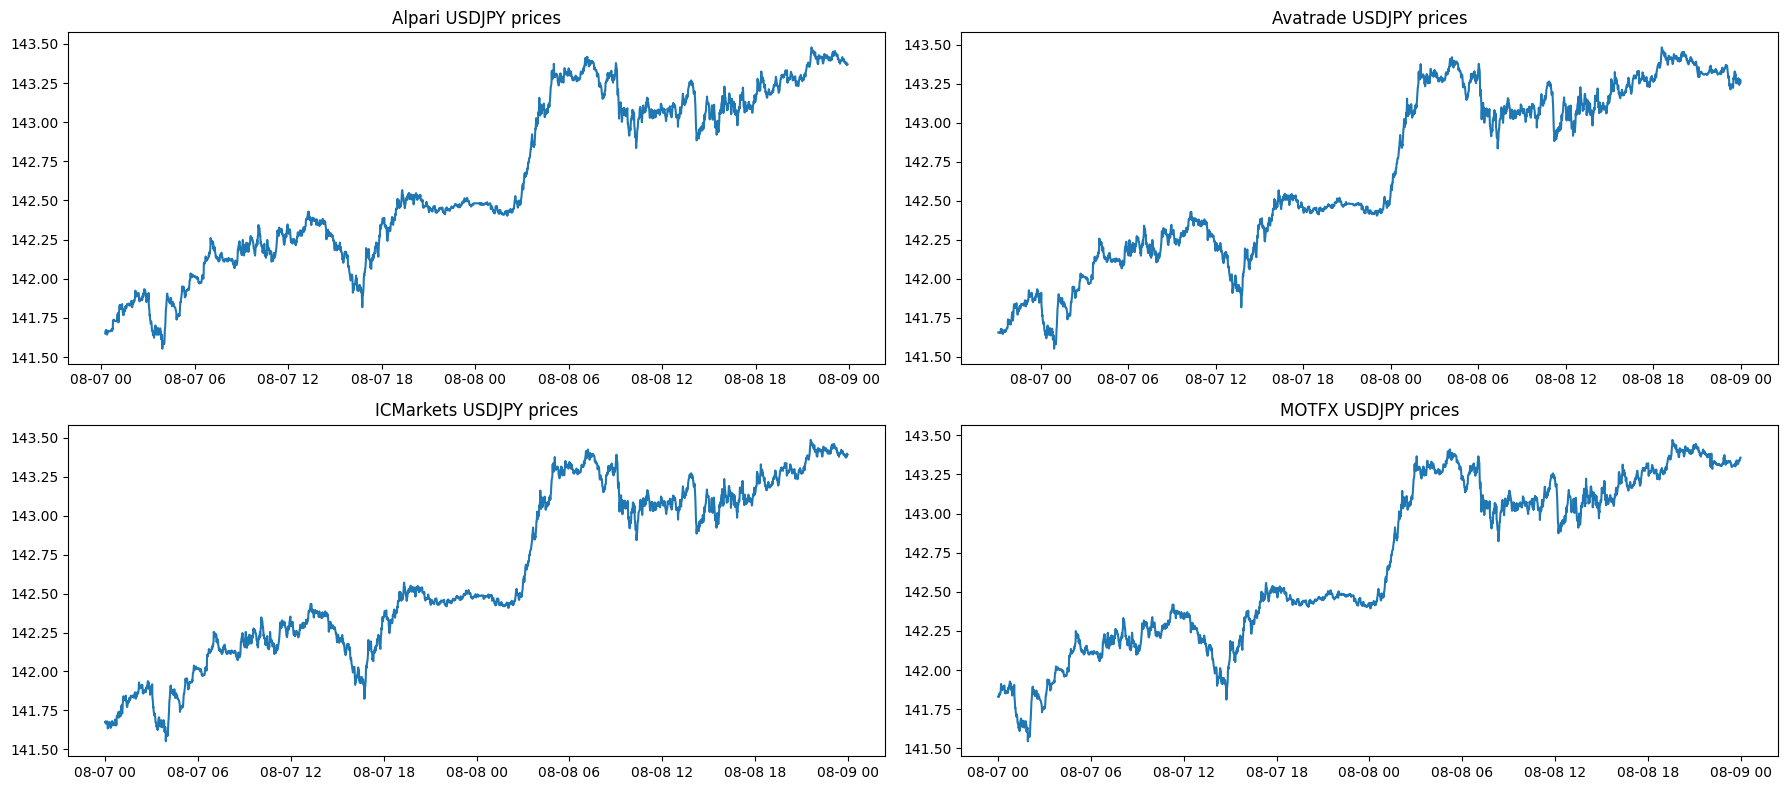

In [28]:
_, axs = plt.subplots(2, 2, figsize=(18, 8))

plot_start = "2023-08-06"
plot_end   = "2023-08-08"

l11 = axs[0,0].plot(df_dict["alpari"][plot_start:plot_end]["Close"])
axs[0,0].set_title(f"Alpari USDJPY prices")

l21 = axs[0,1].plot(df_dict["avatrade"][plot_start:plot_end]["Close"])
axs[0,1].set_title(f"Avatrade USDJPY prices")

l31 = axs[1,0].plot(df_dict["icmarkets"][plot_start:plot_end]["Close"])
axs[1,0].set_title(f"ICMarkets USDJPY prices")

l41 = axs[1,1].plot(df_dict["motfx"][plot_start:plot_end]["Close"])
axs[1,1].set_title(f"MOTFX USDJPY prices")

plt.tight_layout()
plt.show();

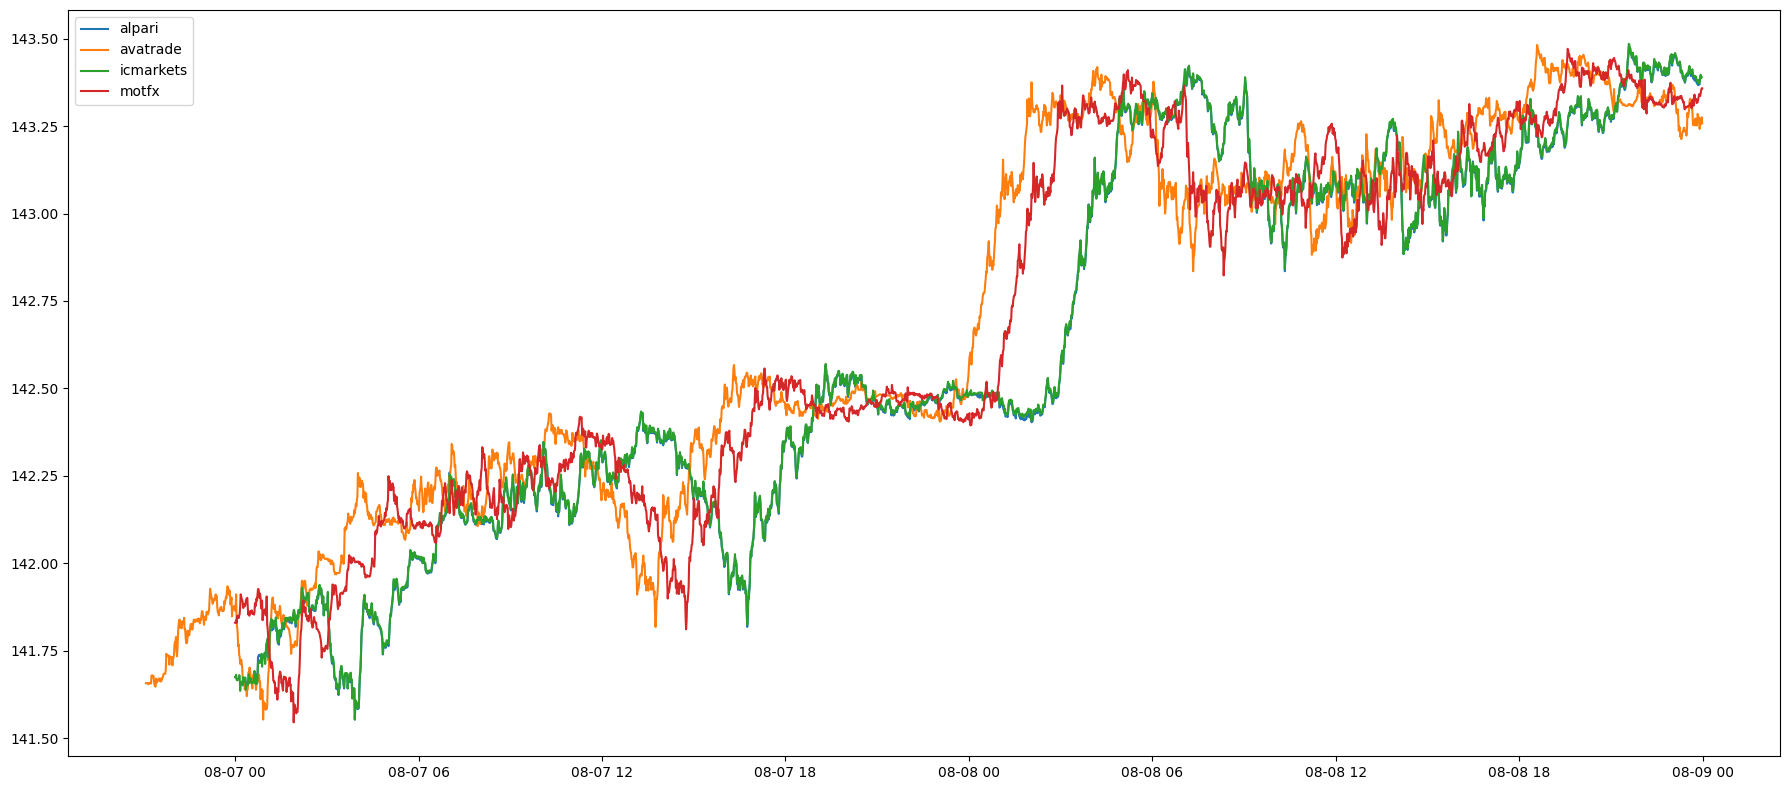

In [29]:
_, axs = plt.subplots(1, figsize=(18, 8))

plot_start = "2023-08-06"
plot_end   = "2023-08-08"

for broker, _ in df_dict.items():
    axs.plot(df_dict[broker][plot_start:plot_end]["Close"], label=f"{broker}")

axs.legend()
plt.tight_layout()
plt.show();

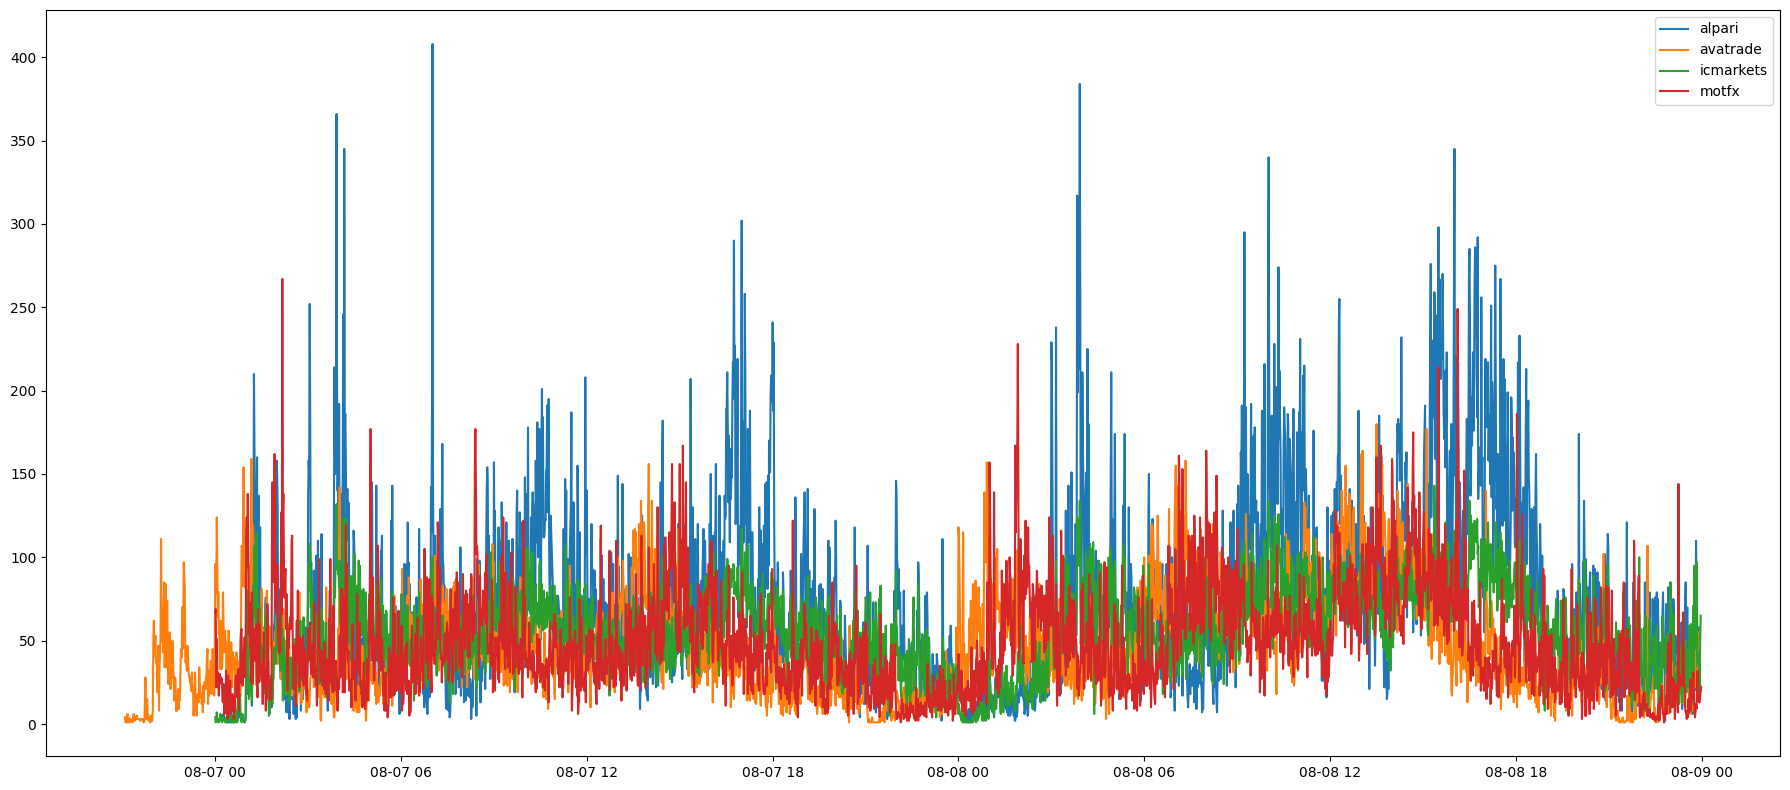

In [30]:
_, axs = plt.subplots(1, figsize=(18, 8))

plot_start = "2023-08-06"
plot_end   = "2023-08-08"

for broker, _ in df_dict.items():
    axs.plot(df_dict[broker][plot_start:plot_end]["Volume"], label=f"{broker}")

axs.legend()
plt.tight_layout()
plt.show();